# Task 1

In [124]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

Create connection to database file.

In [125]:
database = "jupiter.db"
connection = sql.connect(database)

Below is the Moons class which loads data from the Jupiter's moons database. Within this class there are functions created to help achieve this objective.

In [126]:
class Moons:
    def __init__(self, database = 'jupiter.db', connection = sql.connect(database)):
        # Initialize the Moons class with a specified SQLite database or use the default 'jupiter.db'
        self.database = database
        self.connection = connection
        # Read data from the 'moons' table in the SQLite database into a Pandas DataFrame
        self.df = pd.read_sql_query('SELECT * FROM moons', self.connection)
        
    def number_of_moons(self):
        # Return the number of moons in the dataset
        return len(self.df)
        
    def summary_statistics(self):
        # Calculate and return summary statistics for the DataFrame
        return self.df.describe()
    
    def correlation(self):
        # Calculate and return the correlation matrix for the DataFrame
        return self.df.corr()
    
    def extract_moon_data(self, moon_name):
        # Extract data for a specific moon by filtering the DataFrame based on the 'moon_name'
        moon_data = self.df[self.df['moon'] == moon_name]
        return moon_data
    
    def scat_plot(self, x_column, y_column):
        # Create a scatter plot using specified x and y columns
        plt.scatter(self.df[x_column], self.df[y_column])
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.title(f'{x_column} against {y_column}')
        plt.show()
        
    def hist_plot(self, column, bins=10):
        # Create a histogram plot for a specified column 
        plt.hist(self.df[column], bins=bins, edgecolor='blue')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title('Histogram Plot')
        plt.show()
        
    def linear_model_validation(self, feature_column, target_column, num_folds=5):
        # Extract feature and target columns
        X = self.df[[feature_column]]
        y = self.df[target_column]
        # Create a linear regression model
        model = linear_model.LinearRegression()
        # Perform cross-validation and obtain scores
        scores = cross_val_score(model, X, y, cv=num_folds)
        # Print or return the cross-validation scores
        print(f'Cross-Validation Scores: {scores}')
        print(f'Mean Score: {scores.mean()}')
        print(f'Standard Deviation: {scores.std()}')
        return scores

Below we create an instance of the Moons class, initializing the class and assigning it to variable M.

In [127]:
M = Moons()

The .number_of_moons() function can be used to return the total number of moons in the class.

In [128]:
num_moons = M.number_of_moons()
num_moons

56

There are 8 fields of data for each moon and with 56 moons, there are 448 records in the data set.

One can use df.head() on moon class to display the initial few rows of the DataFrame to get a preview of the Moon data.

In [129]:
M.df.head()

,moon,period_days,distance_km,radius_km,mag,mass_kg,group,ecc,inclination_deg
0,Adrastea,0.298,129000.0,8.2,NaN,NaN,Inner,0.001500,0.03
1,Aitne,730.000,23231000.0,1.5,22.7,NaN,Carme,0.264000,165.00
2,Amalthea,0.498,181400.0,83.5,14.1,2.080000e+18,Inner,0.003190,0.37
3,Ananke,630.000,21300000.0,14.0,18.9,NaN,Ananke,0.174725,148.60
4,Aoede,761.000,24000000.0,2.0,22.5,NaN,Pasiphae,0.432000,158.00


One can use the summary statistic method to obtain a summary of the statistics in the data frame.

In [130]:
summary_stats = M.summary_statistics()
summary_stats

,period_days,distance_km,radius_km,mag,mass_kg,ecc,inclination_deg
count,56.000000,5.600000e+01,56.000000,53.000000,6.000000e+00,56.000000,56.000000
mean,525.998146,1.775655e+07,158.969643,20.418302,6.551798e+22,0.222922,113.571607
std,272.670243,8.253688e+06,557.730632,4.926587,6.010469e+22,0.126899,64.562822
min,0.290000,1.280000e+05,1.000000,4.610000,2.080000e+18,0.000200,0.030000
25%,258.750000,1.170252e+07,1.500000,20.800000,1.200276e+22,0.159201,30.582500
50%,632.500000,2.129009e+07,2.000000,22.500000,6.865891e+22,0.228000,148.600000
75%,725.500000,2.336375e+07,11.562500,23.000000,1.030252e+23,0.298858,159.175000
max,787.000000,2.458309e+07,2634.100000,23.700000,1.481900e+23,0.611016,166.200000


One can use the .correlation() to return the correlation matrix. This matrix aids ones understanding of the relationship between different variables of the moons data. Values close to 1 or -1 indicate strong positive or negative correlations, while values close to 0 suggest weaker correlations.

In [131]:
correlation_matrix = M.correlation()
correlation_matrix

/tmp/ipykernel_139/3945386183.py:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  return self.df.corr()


,period_days,distance_km,radius_km,mag,mass_kg,ecc,inclination_deg
period_days,1.000000,0.991521,-0.534434,0.742646,-0.504430,0.737181,0.969493
distance_km,0.991521,1.000000,-0.567266,0.799187,-0.453339,0.750819,0.953873
radius_km,-0.534434,-0.567266,1.000000,-0.887393,0.968379,-0.478901,-0.487645
mag,0.742646,0.799187,-0.887393,1.000000,-0.861359,0.554617,0.688529
mass_kg,-0.504430,-0.453339,0.968379,-0.861359,1.000000,-0.543138,-0.489378
ecc,0.737181,0.750819,-0.478901,0.554617,-0.543138,1.000000,0.645961
inclination_deg,0.969493,0.953873,-0.487645,0.688529,-0.489378,0.645961,1.000000


One can use the .extract_moon_data() function to view the data available on a desired moon.

In [132]:
# e.g. Viewing data on the moon Aitne
moon_data = M.extract_moon_data('Aitne')
moon_data

,moon,period_days,distance_km,radius_km,mag,mass_kg,group,ecc,inclination_deg
1,Aitne,730.0,23231000.0,1.5,22.7,NaN,Carme,0.264,165.0


One can use the .scat_plot() function to obtain a scatter plot of one variable against another.

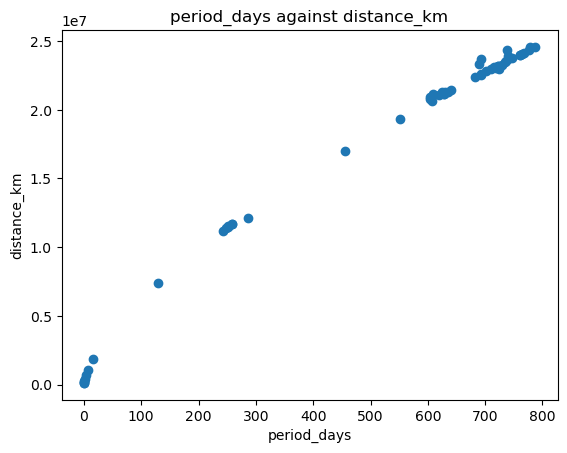

In [133]:
# e.g. We take a look at the relationship between period_days and distance_km
M.scat_plot('period_days', 'distance_km')

As we can see from the scatter plot above, while not entirely linear, there seems to be some correlation between the moon variables period_days and distance_km. It can also be seen in the correlation matrix that the two variables have a 0.991521 correlation, indicating a strong positive correlation.

 It is also observed that the variables radius_km and mass_kg have a strong positive correlation with a correlation value of 0.968379.

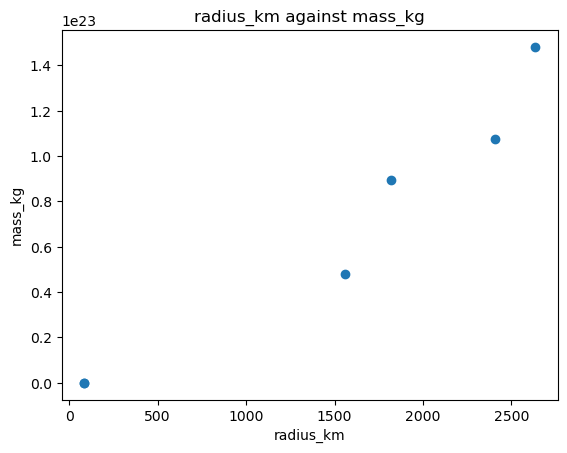

In [134]:
# e.g. Relationship between radius_km and mass_kg
M.scat_plot('radius_km', 'mass_kg')

Based on prior knowledge, the existence of these highly correlated relationships are reasonable.

Similarly, one can use the .hist_plot() to plot a histogram which allows one to view the frequency of occurance of a selected variable.

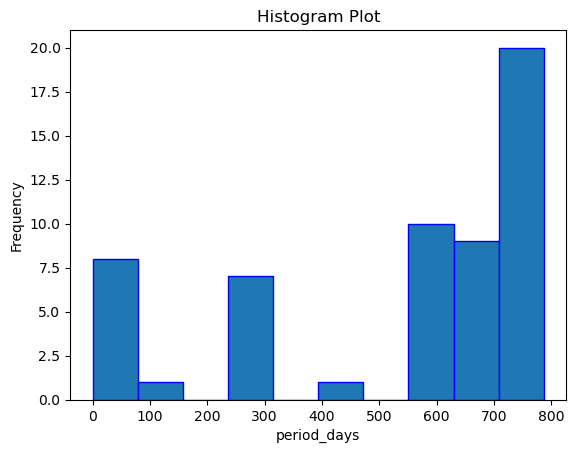

In [135]:
# e.g. Plotting the frequency of period_days
M.hist_plot('period_days')

Answer the questions....

# Task 2

Bewlow we train a data set to create a linear regression model.

In [136]:
from sklearn.model_selection import train_test_split

# Select the columns 'period_days' and 'distance_km' from the DataFrame
# Since T^2 is proportional to a^3 as provided by the equation, we will test their linear regression
# Adjust for units; we want T_2 in seconds squared and a_3 in metres cubed
T_2 = (M.df[['period_days']] * 24 * 60 * 60) ** 2
a_3 = (M.df['distance_km'] * 1000)** 3

# Prepare the input data, separating into training and testing sets
x_train_moons, x_test_moons, y_train_moons, y_test_moons = train_test_split(T_2, a_3, test_size=0.3, random_state=1)

Below we initialize a linear regression model, train it using the provided training set (x_train_moons, y_train_moons), and then use the trained model to make predictions on the testing set (x_test_moons). The goal is to assess how well the model generalizes to new, unseen data by comparing its predictions to the actual values in the testing set.

In [137]:
# create an instance of the model
from sklearn import linear_model
model = linear_model.LinearRegression(fit_intercept=True)

# train the model using the training set
model.fit(x_train_moons, y_train_moons)

# use the model to predict y-values of the testing set
pred = model.predict(x_test_moons)

Create a a residual plot and a dashed line at zero for reference. The plot is useful for checking the assumptions of a linear regression model, such as the randomness and homoscedasticity of residuals.

Text(0, 0.5, 'Distance (m)')

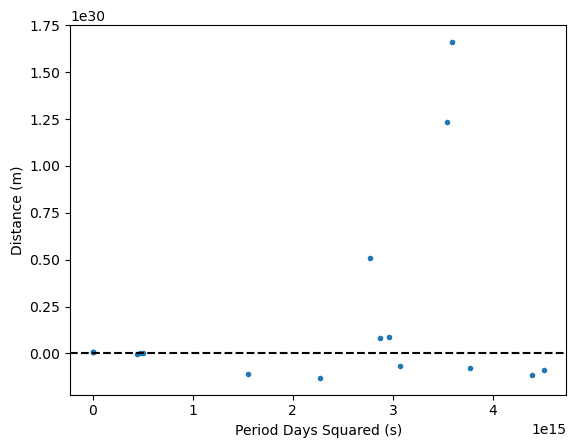

In [138]:
fig, ax = plt.subplots()
# Create a plot of residuals
ax.plot(x_test_moons,y_test_moons - pred,'.')
# Add a horizontal line at zero to guide the eye
ax.axhline(0, color='k', linestyle='dashed')
# Add axis labels
ax.set_xlabel('Period Days Squared (s)')
ax.set_ylabel('Distance (m)')

Below we plot our linear regression model. this creates a visualization with a scatter plot for the actual values and a line plot for the predicted values, allowing you to visually assess how well the linear regression model fits the testing data.

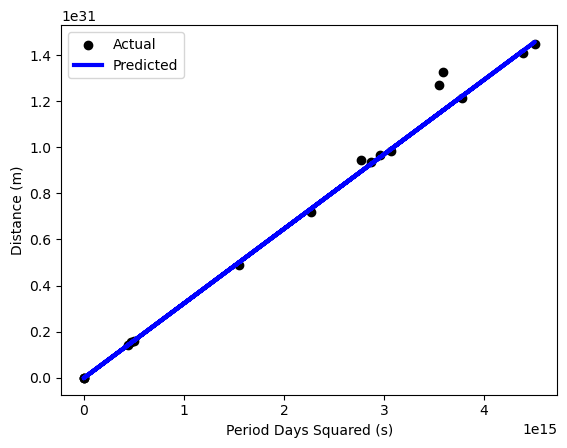

In [139]:
import matplotlib.pyplot as plt
# Scatter plot of actual values
plt.scatter(x_test_moons, y_test_moons, color='black', label='Actual')
# Line plot of predicted values
plt.plot(x_test_moons, pred, color='blue', linewidth=3, label='Predicted')
# Axis labels and legend
plt.xlabel('Period Days Squared (s)')
plt.ylabel('Distance (m)')
plt.legend()
plt.show()

In [140]:
gradient = model.coef_[0]
print("Gradients:", gradient)

Gradients: 3233750354695096.5


It can be indicated from the gradient calculated above that there is a positive relationship between the square of the period days and the cube of the distance.

In [141]:
M.linear_model_validation('period_days', 'distance_km')

Cross-Validation Scores: [0.98537381 0.9699614  0.98763642 0.96912008 0.98584519]
Mean Score: 0.9795873795084636
Standard Deviation: 0.008242013147941363


array([0.98537381, 0.9699614 , 0.98763642, 0.96912008, 0.98584519])

In [142]:
mass_jupiter = (4 * np.pi ** 2)/(6.67e-11) * gradient
mass_jupiter

1.9139932073597e+27

The true value of Jupiter's mass is 1.898 × 10^27 kg. We can use the value we obtained and the true value to calculate the relative error in our result.

In [143]:
def relative_error(estimate, true_val):
    R = abs((estimate - true_val) / true_val) * 100
    return R

In [144]:
relative_error(1.9139932073597e+27, 1.898e+27)

0.8426347397102241

With a relative error of 0.8426347397102241, this indicates that the relative error is less than 1%, which suggests that our estimate is relatively close to the true value.

------------------------------------------------------------------------------------------------------